numpy-2.2.4 and gensim-4.3.3

In [1]:
# !pip uninstall numpy -y
# !pip install numpy==1.24.3

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 108.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.3 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
blosc2 3.3.1 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.5 requir

In [ ]:
#!pip install --upgrade --force-reinstall gensim

In [8]:
from gensim.models import Word2Vec

In [9]:
from google.colab import drive
import pickle

In [5]:
# Mount Google Drive
def connect_to_drive():
    """
    Connect to Google Drive from Google Colab.
    """
    drive.mount('/content/drive')
    print("Google Drive connected.")

In [6]:
connect_to_drive()

Mounted at /content/drive
Google Drive connected.


In [ ]:
# Load a list of photos file from Google Drive
def load_photos(filename):
    """
    Load a file containing a list of photo IDs.
    Returns a list of photo IDs.
    """
    # Load the file content
    file = load_fp(filename)
    # Split into lines and remove the last empty line
    photos = file.split("\n")[:-1]
    return photos

# Load a file from Google Drive
def load_fp(filepath):
    """
    Load the content of a file from the given filepath from GDrive
    Returns the content string of the file.
    """
    with open(filepath, 'r') as file:
        content = file.read()
    return content

# Load features from a pickle file
def load_features(photos, filepath):
    """
    Load features from a pickle file and filter them for the given photos.
    - photos: List of photo IDs to filter features for.
    Returns a dictionary of features for the given photos.
    """
    # Load all features from the pickle file
    with open(filepath, "rb") as file:
        all_features = pickle.load(file)

    # Filter features for the given photos
    features = {photo: all_features[photo] for photo in photos if photo in all_features}
    return features

# Load and clean descriptions for the given photos
def load_clean_descriptions(filepath, photos):
    """
    Load and clean descriptions for the given photos.
    - filepath: Path to the file containing descriptions.
    - photos: List of photo IDs to filter descriptions for.
    Returns a dictionary of descriptions where keys are photo IDs and values are lists of captions.
    """
    # Load the file content
    file = load_fp(filepath)
    descriptions = {}

    # Process each line in the file
    for line in file.split("\n"):
        words = line.split()
        if len(words) < 1:  # Skip empty lines
            continue

        # Extract image ID and caption
        image, image_caption = words[0], words[1:]

        # Only include descriptions for photos in the given list
        if image in photos:
            if image not in descriptions:
                descriptions[image] = []
            # Join the caption words and add to the descriptions dictionary
            desc = " ".join(image_caption)
            descriptions[image].append(desc)
    return descriptions

In [ ]:
# Main function to connect to Google Drive and process files
# def main():
    # connect_to_drive()
    # Define file paths (update these paths as per your Google Drive structure)
descriptions_path = '/content/drive/MyDrive/instagram_post_generator/descriptions.txt'
features_path = '/content/drive/MyDrive/instagram_post_generator/features.p'

# Load features and descriptions
photos = load_photos('/content/drive/MyDrive/instagram_post_generator/Flickr8k_text/Flickr_8k.trainImages.txt')

print("Loading features...")
features = load_features(photos, features_path)
print(f"Features loaded for {len(features)} photos.")

print("Loading descriptions...")
descriptions = load_clean_descriptions(descriptions_path, photos)
print(f"Descriptions loaded for {len(descriptions)} photos.")

# Print sample descripitons
print("Sample descriptions:")

for photo_id, captions in list(descriptions.items())[:3]:  # Print first 3 descriptions
    print(f"{photo_id}: {captions}")

# Run the main function
#if __name__ == "__main__":
    #main()

Loading features...
Features loaded for 6000 photos.
Loading descriptions...
Descriptions loaded for 6000 photos.
Sample descriptions:
1000268201_693b08cb0e.jpg: ['child in pink dress is climbing up set of stairs in an entry way', 'girl going into wooden building', 'little girl climbing into wooden playhouse', 'little girl climbing the stairs to her playhouse', 'little girl in pink dress going into wooden cabin']
1001773457_577c3a7d70.jpg: ['black dog and spotted dog are fighting', 'black dog and tricolored dog playing with each other on the road', 'black dog and white dog with brown spots are staring at each other in the street', 'two dogs of different breeds looking at each other on the road', 'two dogs on pavement moving toward each other']
1002674143_1b742ab4b8.jpg: ['little girl covered in paint sits in front of painted rainbow with her hands in bowl', 'little girl is sitting in front of large painted rainbow', 'small girl in the grass plays with fingerpaints in front of white can

In [ ]:
type(descriptions)

dict

In [ ]:
# !pip install --upgrade numpy gensim

In [ ]:
def train_word2vec(data):
    model = Word2Vec([sentence.split() for sentence in data], vector_size=100, window=5, min_count=1, workers=-1)
    return model

In [ ]:
# Convert dictionary of descriptions to a list of all descriptions
def dict_to_list(descriptions):
    """
    Convert a dictionary of image descriptions into a list of all descriptions.
    - descriptions: Dictionary where keys are image IDs and values are lists of captions.
    """
    all_desc = []
    for key in descriptions.keys():
        # Add all captions for each image
        all_desc.extend(descriptions[key])
    return all_desc

In [ ]:
from gensim.models import Word2Vec


def train_word2vec(data, vector_size=100, window=5, min_count=1, workers=4, epochs=5):
  """
  Train a Word2Vec model on the given data.
  - data: List of sentences (each sentence is a list of words).
  - vector_size: Dimensionality of the word vectors.
  - window: Maximum distance between the current and predicted word.
  - min_count: Ignores words with total frequency lower than this.
  - workers: Number of worker threads to train the model.
  - epochs: Number of training epochs.

  Returns a trained Word2Vec model.
  """
  # Tokenize the data into a list of word lists
  tokenized_data = [sentence.split() for sentence in data]

  # Initialize the Word2Vec model
  model = Word2Vec(vector_size=vector_size, window=window, min_count=min_count, workers=workers)

  # Build the vocabulary
  model.build_vocab(tokenized_data)

  # Train the model
  model.train(tokenized_data, total_examples=len(tokenized_data), epochs=epochs)

  return model

In [ ]:
import random

def split_descriptions(descriptions, train_ratio=0.85):
    """
    split a list of descriptions into two parts: training and validation.
    - descriptions: List of descriptions to be split.
    - train_ratio: Proportion of the data to include in the training set (default is 0.85).
    Returns two lists: (1) train_descriptions and (2) val_descriptions.
    """
    # shuffle the list to ensure randomness
    random.shuffle(descriptions)

    # calculate the split index
    split_index = int(len(descriptions) * train_ratio)

    # split the list into training and validation sets
    train_descriptions = descriptions[:split_index]
    val_descriptions = descriptions[split_index:]

    return train_descriptions, val_descriptions

In [ ]:
# tokenized_data = [sentence.split() for sentence in data]

In [ ]:
# convert dictionary to list for the descriptions for easy processing
descriptions_list = dict_to_list(descriptions)
descriptions_list[:10]

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin',
 'black dog and spotted dog are fighting',
 'black dog and tricolored dog playing with each other on the road',
 'black dog and white dog with brown spots are staring at each other in the street',
 'two dogs of different breeds looking at each other on the road',
 'two dogs on pavement moving toward each other']

In [ ]:
# Make train and validation descriptions
train_descriptions, val_descriptions = split_descriptions(descriptions_list)

In [ ]:
# Train the Word2Vec model
# word2vec_model = train_word2vec(train_descriptions, vector_size=len(train_descriptions), window=5, min_count=1, workers=4, epochs=8)

# Get the embeddings
# model_embeddings = word2vec_model.wv

In [ ]:
# Save the model
# word2vec_model.save("/content/drive/MyDrive/instagram_post_generator/word2vec.model")

Embeddings

In [ ]:
# Load the saved Word2Vec model
word2vec = Word2Vec.load("/content/drive/MyDrive/instagram_post_generator/word2vec.model")

# Get Embeddings for all the vocab words
vocab = word2vec.wv.index_to_key
embeddings = {word: word2vec.wv[word] for word in vocab}
print(f"Number of words in vocabulary: {len(vocab)}")

Number of words in vocabulary: 7072


In [ ]:
embedding_dim = word2vec.wv.vector_size

In [ ]:
len(embeddings), embedding_dim

(7072, 25500)

Model Building

Training Process:

Use teacher forcing to stabilize training.
Compute the loss (e.g., cross-entropy) and backpropagate.

Fine-tune the model by unfreezing parts of the encoder.

Evaluation:

Generate captions for validation images.
Compute metrics like BLEU or CIDEr.

In [1]:
import torch.nn as nn
import torch

In [3]:
print(torch.__version__)

2.7.0


Processes image features: use features.p

Initialize a embedding matrix with the pretrained word2vec model

In [ ]:
!pip install tensorflow

In [ ]:
# Flatten descriptions and duplicate image features
list_descriptions = []
list_image_features = []

# to make sure the shapes are consistent
for image_id, description in descriptions.items():
    for desc in description:
        list_descriptions.append(desc) # descriptions are image descriptions dictionary
        list_image_features.append(features[image_id]) # features are image features dictionary

Tokenizing and Padding

In [ ]:
import pickle

with open("/content/drive/MyDrive/instagram_post_generator/tokenizer.p", "rb") as f:
    tokenizer = pickle.load(f)

In [ ]:
from torch.utils.data import Dataset, DataLoader
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch
from torch.utils.data import Dataset

In [ ]:
# Tokenize the descriptions
train_tokenized = tokenizer.texts_to_sequences(train_descriptions)
val_tokenized = tokenizer.texts_to_sequences(val_descriptions)

# Pad the tokenized descriptions
max_len = 20  # Adjust based on your dataset
train_padded = pad_sequences(train_tokenized, maxlen=max_len, padding="post")
val_padded = pad_sequences(val_tokenized, maxlen=max_len, padding="post")

# Split into input_tokens and target_tokens
train_input_tokens = train_padded[:, :-1]  # All tokens except the last one
train_target_tokens = train_padded[:, 1:]  # All tokens except the first one

val_input_tokens = val_padded[:, :-1]
val_target_tokens = val_padded[:, 1:]

print(f"Train input tokens shape: {train_input_tokens.shape}")
print(f"Train target tokens shape: {train_target_tokens.shape}")
print(f"Validation input tokens shape: {val_input_tokens.shape}")
print(f"Validation target tokens shape: {val_target_tokens.shape}")

Train input tokens shape: (25500, 19)
Train target tokens shape: (25500, 19)
Validation input tokens shape: (4500, 19)
Validation target tokens shape: (4500, 19)


In [ ]:
from sklearn.model_selection import train_test_split

# Split descriptions and image features into training and validation sets
train_descriptions, val_descriptions, train_image_features, val_image_features = train_test_split(
    list_descriptions, list_image_features, test_size=0.2, random_state=0
)

In [ ]:
# Check lengths
print(len(train_descriptions), len(val_descriptions))  # Should match
print(len(train_image_features), len(val_image_features))  # Should match

24000 6000
24000 6000


In [ ]:
# Compute the lengths of all captions
caption_lengths = [len(sentence.split()) for sentence in train_descriptions]

In [ ]:
import numpy as np

In [ ]:
np.unique(caption_lengths)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 32])

In [ ]:
# Set max_len to 20 for now
max_len = 20

Load Tokenizer

In [ ]:
import pickle

# Load the tokenizer from the pickle file
with open("/content/drive/MyDrive/instagram_post_generator/tokenizer.p", "rb") as file:
    tokenizer = pickle.load(file)

# Check the tokenizer's word index
print(f"Vocabulary size: {len(tokenizer.word_index)}")

Vocabulary size: 7577


In [ ]:
def save_tokenizer(tokenizer, filename="tokenizer.p"):
    """
    Save the tokenizer object to a pickle file.
    - tokenizer: Fitted Tokenizer object.
    - filename: Name of the file to save the tokenizer.
    """
    with open(filename, "wb") as file:
        pickle.dump(tokenizer, file)

In [ ]:
import numpy as np
import torch

def create_embedding_matrix_word2vec(tokenizer, word2vec, embedding_dim):
    """
    Create an embedding matrix using Word2Vec embeddings.

    Args:
        tokenizer: The tokenizer used to tokenize the captions (e.g., Keras Tokenizer).
        word2vec: The pretrained Word2Vec model (gensim Word2Vec object).
        embedding_dim: The dimension of the Word2Vec embeddings.

    Returns:
        A PyTorch tensor containing the embedding matrix.
    """
    vocab_size = len(tokenizer.word_index) + 1  # Add 1 for padding token
    embedding_matrix = np.random.uniform(-0.05, 0.05, (vocab_size, embedding_dim))  # Random initialization

    # Get the Word2Vec vocabulary
    word2vec_vocab = set(word2vec.wv.index_to_key)

    for word, i in tokenizer.word_index.items():
        if word in word2vec_vocab:  # Check if the word exists in Word2Vec
            embedding_matrix[i] = word2vec.wv[word]  # Use the pretrained vector
        else:
            # Word not in Word2Vec, keep the random initialization
            pass

    print(f"Embedding matrix created with shape: {embedding_matrix.shape}")
    return torch.tensor(embedding_matrix, dtype=torch.float32)

In [ ]:
embedding_matrix = create_embedding_matrix_word2vec(tokenizer, word2vec, embedding_dim)

Embedding matrix created with shape: (7578, 25500)


In [ ]:
# Save the embedding matrix
# np.save("/content/drive/MyDrive/instagram_post_generator/embedding_matrix.npy", embedding_matrix)
print("Embedding matrix saved successfully!")

Embedding matrix saved successfully!


In [ ]:
# Load the embedding matrix
loaded_embedding_matrix = np.load("/content/drive/MyDrive/instagram_post_generator/embedding_matrix.npy")
print(f"Loaded embedding matrix shape: {loaded_embedding_matrix.shape}")

Loaded embedding matrix shape: (7578, 25500)


Train and Valid Loaders

In [ ]:
from torchvision.models import resnet50
from torch.utils.data import Dataset, DataLoader
from tensorflow.keras.preprocessing.sequence import pad_sequences

Transform image and get image features

In [ ]:
from torchvision import models, transforms
from PIL import Image
import torch

# Define the image preprocessing pipeline
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the input size of ResNet50
    transforms.ToTensor(),          # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Load the new image
image_path = "/path/to/new_image.jpg"
image = Image.open(image_path).convert("RGB")  # Ensure the image is in RGB format

# Preprocess the image
input_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension

# Load the feature extractor (e.g., ResNet50)
resnet = models.resnet50(pretrained=True)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])  # Remove the classification head
resnet.eval()

# Extract image features
with torch.no_grad():
    image_features = resnet(input_tensor).squeeze(0)  # Remove batch dimension
    print(f"Extracted image features shape: {image_features.shape}")

CNN + LSTM

In [ ]:
import torch.nn as nn
import torch

split data

In [ ]:
from sklearn.model_selection import train_test_split

image_ids = list(descriptions.keys())
train_ids, val_ids = train_test_split(image_ids, test_size=0.15, random_state=42)

train_descriptions = {img_id: descriptions[img_id] for img_id in train_ids}
val_descriptions = {img_id: descriptions[img_id] for img_id in val_ids}

Train and Val generators

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --- Dataset Class (Corrected __getitem__) ---
class CaptioningDataset(Dataset):
    """
    PyTorch Dataset for Image Captioning.

    Args:
        features (list): A list of NumPy arrays, where each array is the
                         feature vector for an image corresponding to the
                         description at the same index in the 'descriptions' list.
        descriptions (list): A list of strings, where each string is a single
                             caption. descriptions[i] corresponds to features[i].
        tokenizer: A fitted tokenizer object (e.g., Keras Tokenizer) with
                   methods like texts_to_sequences.
        max_length (int): The maximum length for padded sequences.
        vocab_size (int): The total size of the vocabulary.
                          (Note: It's often more robust to derive this from the
                           tokenizer, e.g., len(tokenizer.word_index) + 1)
    """
    def __init__(self, features, descriptions, tokenizer, max_length, vocab_size):
        # Ensure the input lists are parallel
        assert len(features) == len(descriptions), \
            f"Features list length ({len(features)}) and descriptions list " \
            f"length ({len(descriptions)}) must be the same."

        self.tokenizer = tokenizer
        self.max_length = max_length
        self.vocab_size = vocab_size # Using the provided vocab_size
        # self.vocab_size = len(tokenizer.word_index) + 1

        self.samples = []
        print(f"Processing {len(descriptions)} description-feature pairs...")

        # Iterate through the parallel lists of features and descriptions
        for img_feature, desc in zip(features, descriptions):
            # Convert description to sequence of token IDs
            # Note: desc is now a single string, not a list
            seq = self.tokenizer.texts_to_sequences([desc])[0]

            # Create input-output pairs for the sequence
            # For sequence [w1, w2, w3], generate:
            # (feature, [pad..w1], w2), (feature, [pad..w1,w2], w3)
            for i in range(1, len(seq)):
                in_seq = seq[:i]
                out_seq = seq[i] # The target word ID (an integer)

                # Pad the input sequence
                # Use 'post' padding as is common, ensure consistent dtype
                in_seq_padded = pad_sequences([in_seq], maxlen=self.max_length, padding='post', truncating='post')[0].astype(np.int64)

                # Store the tuple: (image_feature, padded_input_sequence, target_word_id)
                # Ensure features have a consistent float type
                self.samples.append((img_feature.astype(np.float32), in_seq_padded, np.int64(out_seq)))

        print(f"Created {len(self.samples)} input-output samples.")
        if not self.samples:
             print("Warning: Dataset created 0 samples. Check input data and tokenizer.")

    def __len__(self):
        """Returns the total number of samples (input-output pairs)."""
        return len(self.samples)

    def __getitem__(self, idx):
        """
        Retrieves the sample corresponding to the given index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing:
                - img_tensor (torch.Tensor): Image features (dtype=float32).
                - seq_tensor (torch.Tensor): Padded input sequence (dtype=long).
                - target_tensor (torch.Tensor): Target word ID (dtype=long, scalar).
        """
        # Retrieve the pre-processed sample based on index
        # Items are already NumPy arrays/scalars with defined dtypes from __init__
        img_feature_np, in_seq_np, out_seq_scalar = self.samples[idx]

        # Convert numpy arrays/scalars to PyTorch tensors
        img_tensor = torch.tensor(img_feature_np, dtype=torch.float32)
        seq_tensor = torch.tensor(in_seq_np, dtype=torch.long)
        target_tensor = torch.tensor(out_seq_scalar, dtype=torch.long) # Target is a single value (class index)

        return img_tensor, seq_tensor, target_tensor

In [ ]:
max_length = 30

Train and Validation

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
descriptions["1000268201_693b08cb0e.jpg"]

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

In [ ]:
# Load features (dict of {img_id: np.array})
import pickle

with open("/content/drive/MyDrive/instagram_post_generator/features.p", "rb") as f:
    features = pickle.load(f)

# Use train_image_features, which corresponds to train_descriptions
train_dataset = CaptioningDataset(
    features=train_image_features,     # <-- FIX: Use the split training features
    descriptions=train_descriptions,   # This is the split training descriptions
    tokenizer=tokenizer,
    max_length=max_length,
    vocab_size=vocab_size
)

print("\nCreating Validation Dataset...")
# Use val_image_features, which corresponds to val_descriptions
val_dataset = CaptioningDataset(
    features=val_image_features,       # <-- FIX: Use the split validation features
    descriptions=val_descriptions,     # This is the split validation descriptions
    tokenizer=tokenizer,
    max_length=max_length,
    vocab_size=vocab_size
)


# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2)

Processing 24000 description-feature pairs...
Created 197257 input-output samples.

Creating Validation Dataset...
Processing 6000 description-feature pairs...
Created 49147 input-output samples.


NOTE: The Image Caption Model is developed with assistance from ChatGPT 4.1, for the forward pass of the image caption model and training loops.

In [ ]:
class ImageCaptioningModel(nn.Module):
    def __init__(self, vocab_size, max_length, embed_dim=256, feature_dim=2048, hidden_dim=256, dropout_p=0.5):
        super(ImageCaptioningModel, self).__init__()
        # Feature processing for image
        self.img_dropout = nn.Dropout(dropout_p)
        self.img_dense = nn.Linear(feature_dim, hidden_dim) # Project features to hidden_dim

        # Sequence processor for text
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0) # Assuming 0 is padding index
        self.seq_dropout = nn.Dropout(dropout_p)
        # Using LSTM which processes the whole sequence. batch_first=True is important!
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)

        # Decoder parts
        self.merge_dropout = nn.Dropout(dropout_p)
        self.decoder_dense = nn.Linear(hidden_dim * 2, hidden_dim) # Adjusted input size for concatenation
        self.final_dense = nn.Linear(hidden_dim, vocab_size)

        # Optional: Initialize weights (can sometimes help)
        self._init_weights()

    def _init_weights(self):
      # Simple initialization example
      for name, param in self.named_parameters():
        if 'bias' in name:
           nn.init.constant_(param, 0.0)
        elif 'weight' in name:
           if len(param.shape) > 1: # Xavier for Linear/LSTM weights
                nn.init.xavier_uniform_(param)
           else: # Default for biases or 1D weights
                pass # Keep default init


    def forward(self, img_features, captions):
        # --- Print input shape ---
        # print(f"DEBUG: Shape of img_features at entry: {img_features.shape}")
        # print(f"DEBUG: Shape of captions at entry: {captions.shape}")

        # --- Squeeze img_features if it has an extra dimension ---
        if img_features.dim() == 3 and img_features.shape[1] == 1:
            # If shape is [batch, 1, features], squeeze the middle dimension
            img_features = img_features.squeeze(1)
            # print(f"DEBUG: Shape of img_features after squeeze: {img_features.shape}")
        # Now img_features should be [batch, feature_dim] (2D)

        # Image features processing: (batch, feature_dim) -> (batch, hidden_dim)
        x_img = self.img_dropout(img_features)
        x_img = F.relu(self.img_dense(x_img))  # Shape should now be [batch, hidden_dim] (2D)

        # --- Print shape after dense layer ---
        # print(f"DEBUG: Shape of x_img after dense/relu: {x_img.shape}") # Verify it's 2D

        # Text sequence processing: (batch, max_length) -> (batch, max_length, embed_dim)
        x_seq = self.embedding(captions)       # Shape: [batch, max_length, embed_dim]
        x_seq = self.seq_dropout(x_seq)
        # print(f"DEBUG: Shape of x_seq after embedding: {x_seq.shape}") # Optional check

        # LSTM processing: Input (batch, seq_len, input_size)
        lstm_out, (h_n, c_n) = self.lstm(x_seq)
        # print(f"DEBUG: Shape of lstm_out: {lstm_out.shape}") # Optional check
        # print(f"DEBUG: Shape of h_n: {h_n.shape}") # Optional check

        # Use the robust way to get the final hidden state
        h_n_final = h_n[-1]
        # print(f"DEBUG: Shape of h_n_final after indexing: {h_n_final.shape}") # Verify it's 2D

        # --- Merge Strategy: Concatenation ---
        # Both x_img and h_n_final should now be 2D
        merged_features = torch.cat((x_img, h_n_final), dim=1) # Should now work
        x = self.merge_dropout(merged_features)

        # --- Decoder ---
        x = F.relu(self.decoder_dense(x))
        out = self.final_dense(x)

        # ===== DEBUG PRINTS =====
        # print("\nDebug Shapes:")
        # print(f"img_features: {img_features.shape}")
        # print(f"captions: {captions.shape}")
        # print(f"x_img (after dense): {x_img.shape}")
        # print(f"x_seq (after embedding): {x_seq.shape}")
        # print(f"h_n_final (LSTM final state squeezed): {h_n_final.shape}")
        # print(f"merged_features (concatenated): {merged_features.shape}")
        # print(f"Output before final dense: {x.shape}")
        # print(f"Final output (logits): {out.shape}")

        return out


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
# from torch.optim.lr_scheduler import StepLR # Keep StepLR as in original
from torch.optim.lr_scheduler import ReduceLROnPlateau # Alternative: Often adapts better
import matplotlib.pyplot as plt
import os # For creating directories
import torch.nn.functional as F

# (Other imports and potential constants)

def train_model(
    model,
    train_loader,
    val_loader,
    num_epochs=30,
    lr=1e-3,
    patience=5,
    # The desired path is already the default value here:
    best_model_path="/content/drive/MyDrive/instagram_post_generator/model/generator_model.pt",
    device='cuda' if torch.cuda.is_available() else 'cpu'
):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss(ignore_index=0) # Assuming 0 is padding index
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=patience, gamma=0.5) # Or ReduceLROnPlateau

    best_val_loss = float('inf')
    patience_counter = 0
    history = {'train_loss': [], 'val_loss': []}

    # Ensure the directory for saving the model exists
    os.makedirs(os.path.dirname(best_model_path), exist_ok=True) # Creates the directory if needed
    print(f"Model will be saved to: {best_model_path}")
    print(f"--- Starting Training on {device} ---")

    import time # Add this import at the top

    # ... inside train_model, before the epoch loop ...
    print(f"--- Starting Training on {device} ---")
    start_time_total = time.time() # Start total timer

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_samples = 0
        for batch_idx, (img_features, captions, targets) in enumerate(train_loader):
            img_features = img_features.to(device)
            captions = captions.to(device)
            # Ensure targets are long type and on the correct device
            targets = targets.long().to(device) # Use .long() for casting

            optimizer.zero_grad()
            outputs = model(img_features, captions)  # shape: [batch, vocab_size]

            # Ensure targets is 1D tensor of class indices
            # This might not be strictly needed if dataset guarantees scalar targets,
            # but it's a safe check.
            if targets.dim() > 1:
                targets = targets.squeeze()

            # --- Debug prints (commented out for normal run) ---
            # if batch_idx == 0 and epoch == 0: # Print only for first batch of first epoch
            #     print(f"\n--- Batch Shapes (Epoch {epoch+1}) ---")
            #     print(f"img_features shape: {img_features.shape}")
            #     print(f"captions shape: {captions.shape}")
            #     print(f"targets shape: {targets.shape}")
            #     print(f"Outputs shape: {outputs.shape}")
            #     print(f"Targets dtype: {targets.dtype}")
            #     print(f"Targets values sample: {targets[:5]}")
            # --------------------------------------------

            try:
                loss = criterion(outputs, targets)
                loss.backward()
                # Optional: Gradient clipping (helps prevent exploding gradients)
                # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                optimizer.step()

                train_loss += loss.item() * img_features.size(0) # Accumulate loss scaled by batch size
                train_samples += img_features.size(0)
            except Exception as e:
                print(f"\nError during training batch {batch_idx}: {e}")
                print(f"  Outputs shape: {outputs.shape}, dtype: {outputs.dtype}")
                print(f"  Targets shape: {targets.shape}, dtype: {targets.dtype}")
                print(f"  Targets min: {targets.min()}, max: {targets.max()}, vocab_size: {model.final_dense.out_features}")
                # Consider skipping batch or stopping based on error
                continue # Skip batch on error

        # Calculate average training loss for the epoch
        if train_samples > 0:
             train_loss /= train_samples
        else:
             train_loss = 0.0 # Handle case where train_loader might be empty
        # train_loss calculation...
        history['train_loss'].append(train_loss)

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_samples = 0
        with torch.no_grad():
            for img_features, captions, targets in val_loader:
                img_features = img_features.to(device)
                captions = captions.to(device)
                # Ensure targets are long type and on the correct device
                targets = targets.long().to(device) # Use .long() for casting

                outputs = model(img_features, captions)

                # Ensure targets is 1D tensor of class indices
                if targets.dim() > 1:
                    targets = targets.squeeze()

                try:
                    loss = criterion(outputs, targets)
                    val_loss += loss.item() * img_features.size(0) # Accumulate loss scaled by batch size
                    val_samples += img_features.size(0)
                except Exception as e:
                    print(f"\nError during validation: {e}")
                    print(f"  Outputs shape: {outputs.shape}, dtype: {outputs.dtype}")
                    print(f"  Targets shape: {targets.shape}, dtype: {targets.dtype}")
                    print(f"  Targets min: {targets.min()}, max: {targets.max()}, vocab_size: {model.final_dense.out_features}")
                    continue # Skip batch on error

        # Calculate average validation loss for the epoch
        if val_samples > 0:
            val_loss /= val_samples
        else:
            val_loss = 0.0 # Handle case where val_loader might be empty

        # val_loss calculation...
        history['val_loss'].append(val_loss)

        print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

        # ================================================================
        # Early stopping and model saving
        # ================================================================

        if val_loss < best_val_loss:
            print(f"Validation loss improved ({best_val_loss:.4f} --> {val_loss:.4f}). Saving model...")
            best_val_loss = val_loss
            patience_counter = 0
            try:
                # Save the model state dictionary when validation loss improves
                torch.save(model.state_dict(), best_model_path)
            except Exception as e:
                print(f"Error saving model: {e}")
        else:
            # Increment patience counter if validation loss did not improve
            patience_counter += 1
            print(f"Validation loss did not improve. Patience: {patience_counter}/{patience}")
            # Trigger early stopping if patience runs out
            if patience_counter >= patience:
                print("Early stopping triggered.")
                break # Exit the training loop

        # Step the scheduler (after checking for improvement/early stopping)
        scheduler.step() # Or scheduler.step(val_loss) if using ReduceLROnPlateau
        # ================================================================
        # END OF MATCHING SECTION
        # ================================================================

    end_time_total = time.time() # End total timer
    print(f"\nTotal Training Time: {(end_time_total - start_time_total) / 60:.2f} minutes")

    # ================================================================
    # Load best model weights back into the model after training is complete
    # ================================================================

    # (Loads the state saved during the best epoch)
    print(f"\nLoading best model from {best_model_path} (Val Loss: {best_val_loss:.4f})")
    try:
        model.load_state_dict(torch.load(best_model_path, map_location=device))
    except Exception as e:
         print(f"Error loading best model state_dict: {e}")
    # ================================================================
    # Plotting
    # ================================================================

    # Plot losses
    plt.figure(figsize=(10, 6)) # Slightly larger figure
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    return model, history # Return model with best weights loaded and history

In [ ]:
len(features)

8091

In [ ]:
model = ImageCaptioningModel(
    vocab_size=vocab_size,   # your vocabulary size
    max_length=max_length      # your max sequence length
)

Streaming output truncated to the last 5000 lines.
DEBUG: Shape of img_features after squeeze: torch.Size([64, 2048])
DEBUG: Shape of img_features after squeeze: torch.Size([64, 2048])
DEBUG: Shape of img_features after squeeze: torch.Size([64, 2048])
DEBUG: Shape of img_features after squeeze: torch.Size([64, 2048])
DEBUG: Shape of img_features after squeeze: torch.Size([64, 2048])
DEBUG: Shape of img_features after squeeze: torch.Size([64, 2048])
DEBUG: Shape of img_features after squeeze: torch.Size([64, 2048])
DEBUG: Shape of img_features after squeeze: torch.Size([64, 2048])
DEBUG: Shape of img_features after squeeze: torch.Size([64, 2048])
DEBUG: Shape of img_features after squeeze: torch.Size([64, 2048])
DEBUG: Shape of img_features after squeeze: torch.Size([64, 2048])
DEBUG: Shape of img_features after squeeze: torch.Size([64, 2048])
DEBUG: Shape of img_features after squeeze: torch.Size([64, 2048])
DEBUG: Shape of img_features after squeeze: torch.Size([64, 2048])
DEBUG: Shap

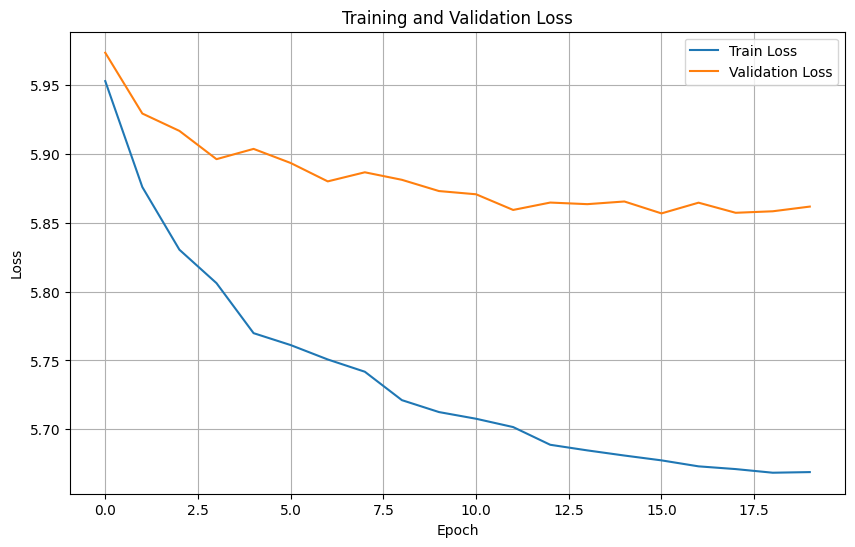

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
trained_model, train_losses, val_losses = train_model(
    model,
    train_loader,
    val_loader,
    num_epochs=30,
    lr=1e-3,
    patience=4,
    best_model_path="/content/drive/MyDrive/instagram_post_generator/model/generator_model.pt"
)

In [ ]:
# Load the saved weights
model_path = "/content/drive/MyDrive/instagram_post_generator/model/generator_model.pt"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

ImageCaptioningModel(
  (img_dropout): Dropout(p=0.5, inplace=False)
  (img_dense): Linear(in_features=2048, out_features=256, bias=True)
  (embedding): Embedding(7578, 256, padding_idx=0)
  (seq_dropout): Dropout(p=0.5, inplace=False)
  (lstm): LSTM(256, 256, batch_first=True)
  (merge_dropout): Dropout(p=0.5, inplace=False)
  (decoder_dense): Linear(in_features=512, out_features=256, bias=True)
  (final_dense): Linear(in_features=256, out_features=7578, bias=True)
)

In [ ]:
import os
import numpy as np
from tqdm import tqdm # Used in your extract_features

# TensorFlow / Keras imports for image loading, preprocessing, and the model
from tensorflow.keras.preprocessing import image # For load_img, img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [ ]:
import torch
import numpy as np
from PIL import Image
import os

# --- TensorFlow / Keras for Feature Extraction ---
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image # For load_img, img_to_array

# --- PyTorch for Captioning Model ---

# --- 1. Load Feature Extractor Model (Keras ResNet50) ---
print("Loading Keras ResNet50 model for feature extraction...")
try:
    # Load the Keras ResNet50 model without the top layer, with average pooling
    keras_feature_extractor = ResNet50(include_top=False, pooling='avg', weights='imagenet')
    print("Keras ResNet50 model loaded.")
except Exception as e:
    print(f"Error loading Keras ResNet50 model: {e}")
    keras_feature_extractor = None # Handle error appropriately

# --- 2. Define Keras Image Preprocessing Function ---
def preprocess_image_for_keras(img_path):
    """Loads, resizes, and preprocesses an image for Keras ResNet50."""
    if not os.path.exists(img_path):
        raise FileNotFoundError(f"Image file not found at: {img_path}")
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
    img_preprocessed = preprocess_input(img_array) # Apply ResNet50 preprocessing
    return img_preprocessed

# --- 3. Load Trained PyTorch Captioning Model ---

# captioning_model = ImageCaptioningModel(...) # Instantiate your PyTorch model class
# best_model_path = "/content/drive/MyDrive/instagram_post_generator/model/generator_model.pt"
# captioning_model.load_state_dict(torch.load(best_model_path, map_location=DEVICE))
# captioning_model = captioning_model.to(DEVICE)
# captioning_model.eval() # Set to evaluation mode
# print("PyTorch captioning model loaded and set to eval mode.")

# --- 4. Define the Inference Function ---

import torch
from tensorflow.keras.preprocessing.sequence import pad_sequences # If used in dataset
import numpy as np


def generate_caption_single_image_no_markers(image_path,
                                              feature_extractor,
                                              caption_model,
                                              tokenizer,
                                              max_length,
                                              device
                                             ):
    """
    Generates a caption for a single image using greedy search,
    assuming the model was NOT trained with <start>/<end> tokens.
    """

    if feature_extractor is None:
        print("Error: Keras feature extractor not loaded.")
        return None

    # --- Extract Features using Keras Model ---
    try:
        image_preprocessed = preprocess_image_for_keras(image_path) # Use the Keras preprocessing
        img_features_np = feature_extractor.predict(image_preprocessed, verbose=0)
        img_features_np = img_features_np.flatten()
    except FileNotFoundError as e:
        print(e)
        return None
    except Exception as e:
        print(f"Error during feature extraction for {image_path}: {e}")
        return None

    # --- Prepare Features for PyTorch Model ---
    img_features_pt = torch.tensor(img_features_np, dtype=torch.float32).unsqueeze(0).to(device)

    # --- Generate Caption using PyTorch Model (Iterative Process) ---
    caption_model.eval() # Ensure caption model is in eval mode

    # Initialize sequence with padding index (assuming 0) !!
    # The first predicted word's quality might be affected.
    padding_index = 0
    in_indices = [padding_index]

    # store caption words here
    generated_caption_indices = []

    with torch.no_grad():
        for _ in range(max_length):
            # Pad the current input sequence
            # Note: The first iteration will use [0, 0, ..., 0] if max_length > 1
            sequence_padded = pad_sequences([in_indices], maxlen=max_length, padding='post')[0]
            sequence_tensor = torch.tensor(sequence_padded, dtype=torch.long).unsqueeze(0).to(device)

            # Get prediction from PyTorch captioning model
            outputs = caption_model(img_features_pt, sequence_tensor)

            # Get the most likely next word index
            temperature = 0.6 # Adjust this value (e.g., 0.5 to 1.0). Higher = more random.
            outputs = caption_model(img_features_pt, sequence_tensor)

            # Scale logits by temperature
            scaled_logits = outputs / temperature
            # Get probabilities
            probs = torch.softmax(scaled_logits, dim=1) # Shape [1, vocab_size]

            # Sample from the distribution. Need squeeze(0) if probs is [1, vocab_size]
            predicted_index = torch.multinomial(probs.squeeze(0), num_samples=1).item()

            # The loop always runs until max_length
            # Stop if padding index is predicted (might indicate model confusion)
            if predicted_index == padding_index:
                 print(f"Warning: Predicted padding index ({padding_index}), stopping generation.")
                 break

            # Append the predicted index
            in_indices.append(predicted_index)
            generated_caption_indices.append(predicted_index)


    # Convert final indices to words
    generated_words = [tokenizer.index_word.get(idx, '?') for idx in generated_caption_indices]
    final_caption = ' '.join(generated_words)

    return final_caption

Loading Keras ResNet50 model for feature extraction...
Keras ResNet50 model loaded.


In [ ]:
keras_feature_extractor

<Functional name=resnet50, built=True>

In [ ]:
model

ImageCaptioningModel(
  (img_dropout): Dropout(p=0.5, inplace=False)
  (img_dense): Linear(in_features=2048, out_features=256, bias=True)
  (embedding): Embedding(7578, 256, padding_idx=0)
  (seq_dropout): Dropout(p=0.5, inplace=False)
  (lstm): LSTM(256, 256, batch_first=True)
  (merge_dropout): Dropout(p=0.5, inplace=False)
  (decoder_dense): Linear(in_features=512, out_features=256, bias=True)
  (final_dense): Linear(in_features=256, out_features=7578, bias=True)
)

In [ ]:
device

device(type='cuda')

In [ ]:
# --- Example Usage ---
image_to_caption = '/content/drive/MyDrive/instagram_post_generator/Flicker8k_Dataset/1012212859_01547e3f17.jpg'

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def display_image(image_path):
  # Load the image
  img = Image.open(image_path)

  # Display with matplotlib
  plt.figure(figsize=(8, 6))
  plt.imshow(img)
  plt.axis('off')
  plt.title("Sample Image")
  plt.show()

  return image_path

In [ ]:
def generate_caption_single_image_no_markers(image_path, keras_feature_extractor, model, tokenizer, max_length, device):
  generated_caption = generate_caption_single_image_no_markers(
      image_path=img1,
      feature_extractor=keras_feature_extractor,
      caption_model=model,
      tokenizer=tokenizer,
      max_length=max_length,
      device=device
  )

  if generated_caption is not None:
      print(f"\nImage: {image_to_caption}")
      print(f"Generated Caption: {generated_caption}")
  else:
      print(f"\nCould not generate caption for {image_to_caption}.")

In [ ]:
# descriptions

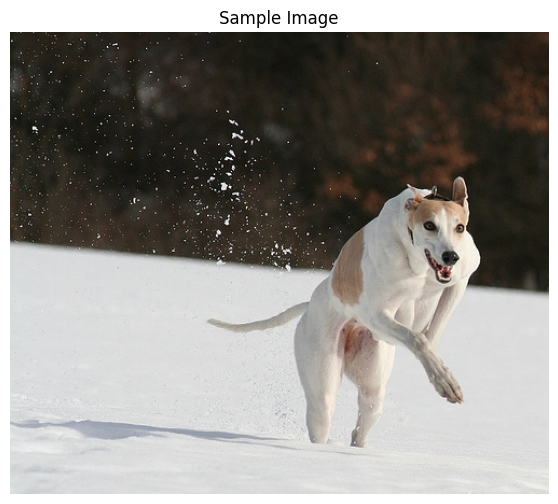

In [ ]:
img1 = display_image("/content/drive/MyDrive/instagram_post_generator/Flicker8k_Dataset/101654506_8eb26cfb60.jpg")

In [ ]:
generate_caption_single_image_no_markers(img1, keras_feature_extractor, model, tokenizer, max_length, device)


Image: /content/drive/MyDrive/instagram_post_generator/Flicker8k_Dataset/1012212859_01547e3f17.jpg
Generated Caption: face dog is dog his brown in through dog dog and and dogs the through dog dog are dogs dog dog dogs running on mouth and stick of dog dogs


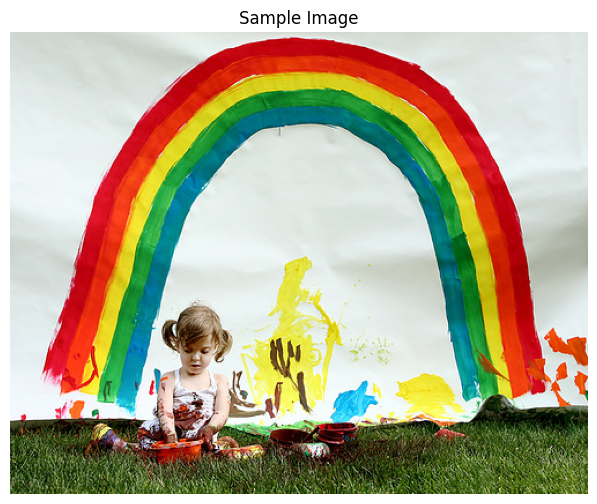

'/content/drive/MyDrive/instagram_post_generator/Flicker8k_Dataset/1002674143_1b742ab4b8.jpg'

In [ ]:
img2 = display_image("/content/drive/MyDrive/instagram_post_generator/Flicker8k_Dataset/1002674143_1b742ab4b8.jpg")
img2

In [ ]:
generate_caption_single_image_no_markers(img2, keras_feature_extractor, model, tokenizer, max_length, device)

Generated Caption: young in with street on the wearing with his is of is in on on street shirt in the shirt on in boys by in by in the the the


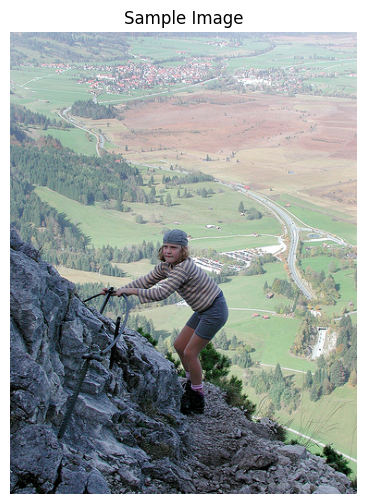

In [ ]:
img3 = display_image('/content/drive/MyDrive/instagram_post_generator/Flicker8k_Dataset/111497985_38e9f88856.jpg')

In [ ]:
# Call the inference function with your loaded objects
generated_caption = generate_caption_single_image_no_markers(
    image_path=img3,
    feature_extractor=keras_feature_extractor, # Your loaded Keras model
    caption_model=model,        # Your loaded PyTorch model
    tokenizer=tokenizer,                     # Your loaded tokenizer
    max_length=max_length,                   # Your defined max length
    device=device                         # Your defined device
)

# Print the result
print(f"Generated Caption: {generated_caption}")

Generated Caption: rock the the in the water walking the through bike the on mud into is on is orange lake red on pack on is front and the on while in


In [ ]:
generate_caption_single_image_no_markers(img3, keras_feature_extractor, model, tokenizer, max_length, device)